## Aprendizaje de reglas de asociación

Objetivo:
    
    derivar reglas de la forma {A} -> {B}
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display

#!pip install efficient_apriori
%matplotlib inline

In [2]:
def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

In [3]:
movies = pd.read_csv('data/ml-20m/movies.csv',sep=",")

print('orders -- dimensions: {0};   size: {1}'.format(movies.shape, size(movies)))
display(movies.head())
display(movies.tail())

orders -- dimensions: (27278, 3);   size: 4.50 MB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title,genres
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


In [4]:
new = movies["title"].str.rsplit("(",n=1,expand=True)

In [5]:
movies["year"] = new[1].str.replace(")","")
movies["Title"] = new[0]

In [6]:
movies["year"] = movies["year"].str.rstrip()

In [7]:
is_digit = movies["year"].str.isdigit()

In [8]:
movies.loc[movies.index[movies["year"].str.isdigit() == False]]

,movieId,title,genres,year,Title
15646,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,Das Millionenspiel,"Millions Game, The"
17341,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,"Bicicleta, cullera, poma","Bicycle, Spoon, Apple"
22368,107434,Diplomatic Immunity (2009– ),Comedy,2009–,Diplomatic Immunity
22669,108548,"Big Bang Theory, The (2007-)",Comedy,2007-,"Big Bang Theory, The"
22679,108583,Fawlty Towers (1975-1979),Comedy,1975-1979,Fawlty Towers


In [9]:
movies["year"].iloc[15646] = "1970"
movies["year"].iloc[17341] = "2010"
movies["year"].iloc[22368] = "2009"
movies["year"].iloc[22669] = "2007"
movies["year"].iloc[22679] = "1979"

/home/marioagustin/.local/lib/python3.6/site-packages/pandas-0.25.1-py3.6-linux-x86_64.egg/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
year_is_na = movies["year"].isna()
print(year_is_na.sum())

17


In [11]:
movies.loc[movies.index[year_is_na]]

,movieId,title,genres,year,Title
10593,40697,Babylon 5,Sci-Fi,None,Babylon 5
23617,112406,Brazil: In the Shadow of the Stadiums,Documentary,None,Brazil: In the Shadow of the Stadiums
23824,113190,Slaying the Badger,Documentary,None,Slaying the Badger
24286,115133,Tatort: Im Schmerz geboren,Crime,None,Tatort: Im Schmerz geboren
24412,115685,National Theatre Live: Frankenstein,Drama|Fantasy,None,National Theatre Live: Frankenstein
26115,125571,The Court-Martial of Jackie Robinson,(no genres listed),None,The Court-Martial of Jackie Robinson
26127,125632,In Our Garden,(no genres listed),None,In Our Garden
26180,125958,Stephen Fry In America - New World,(no genres listed),None,Stephen Fry In America - New World
26335,126438,Two: The Story of Roman & Nyro,Documentary|Drama,None,Two: The Story of Roman & Nyro
26395,126929,Li'l Quinquin,(no genres listed),None,Li'l Quinquin


In [12]:
movies["year"].loc[movies.index[year_is_na]] = "1900"

/home/marioagustin/.local/lib/python3.6/site-packages/pandas-0.25.1-py3.6-linux-x86_64.egg/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
movies["year"] = movies["year"].astype("int32")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b64f9ac8>]],
      dtype=object)

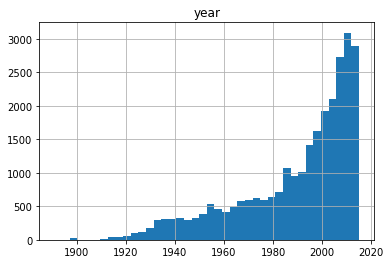

In [14]:
movies.hist(bins=40,column="year")

In [15]:
a = movies["genres"].str.cat(sep='|').split("|")
np.unique(a)

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

In [16]:
index = movies["genres"] == "(no genres listed)"
print(index.sum())

246


In [20]:
generos = movies["genres"].str.split("|")
generos.head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

In [21]:
def swap_the(string):
    i = string.find(", The")
    s = string.rstrip()
    if i != -1:
        s = string[:i]
        s = "The " + s
    return(s)

In [22]:
movies["Title"] = movies["Title"].apply(swap_the)

In [23]:
ratings = pd.read_csv('data/ml-20m/ratings.csv',sep=",",usecols=["userId","movieId","rating"])

print('orders -- dimensions: {0};   size: {1}'.format(ratings.shape, size(ratings)))
display(ratings.head())
display(ratings.tail())

orders -- dimensions: (20000263, 3);   size: 480.01 MB


,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


,userId,movieId,rating
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [24]:
ratings.index[~ratings["movieId"].isin(movies["movieId"])].size

0

In [25]:
ratings.drop(index=ratings.index[ratings["rating"] < 4],inplace=True)
print('orders -- dimensions: {0};   size: {1}'.format(ratings.shape, size(ratings)))

orders -- dimensions: (9995410, 3);   size: 319.85 MB


In [26]:
rename_dict = movies.set_index('movieId').to_dict()['Title']

In [27]:
#ratings["movieId"] = ratings["movieId"].replace(rename_dict)

In [28]:
print(ratings["userId"].unique().shape)
print(ratings["movieId"].unique().shape)

(138287,)
(20720,)


In [29]:
ratings.sample(n=10,random_state=47)

,userId,movieId,rating
6108788,42086,3700,4.0
8668422,59873,922,4.0
8763676,60541,457,4.0
13410792,92682,2082,4.0
13511177,93356,1927,4.0
783767,5216,4178,4.5
4967068,34180,3752,4.0
4468094,30541,733,4.0
19480130,134810,1250,4.5
7944577,54729,5225,4.0


In [30]:
a = ratings.groupby('userId')

In [31]:
i = a.size()

In [33]:
m = 2000
n = np.sum(i.iloc[0:m])
print(n)
ratings['userId'].iloc[n:n+i.iloc[m]]

144483


291764    2004
291766    2004
291768    2004
291770    2004
291771    2004
          ... 
292276    2004
292278    2004
292279    2004
292280    2004
292281    2004
Name: userId, Length: 283, dtype: int64

In [34]:
transactions = []
j = 0
for k in range(i.shape[0]):
    transactions.append(np.array(ratings['movieId'].iloc[j:j+i.iloc[k]]))
    j += i.iloc[k]

In [35]:
from efficient_apriori import apriori
itemsets, rules = apriori(transactions,min_support=0.005,min_confidence=0.2,max_length=2,verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 20720 candidate itemsets of length 1.
  Found 2242 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 2512161 candidate itemsets of length 2.
  Found 222977 large itemsets of length 2.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



In [36]:
a = rules[0]

In [37]:
a.confidence,a.conviction,a.count_full,a.count_lhs,a.count_rhs,a.lhs,a.lift,a.num_transactions,a.rhs,a.support

(0.4745599559955996,
 1.4449599892447713,
 3451,
 7272,
 33294,
 (2,),
 1.9710900653199817,
 138287,
 (1,),
 0.0249553464895471)

In [38]:
rules=sorted(rules, key=lambda rule: rule.confidence,reverse=True)

In [39]:
for item in rules[:5]:
    print("Rule: " + str(rename_dict[item.lhs[0]]) + " -> " + str(rename_dict[item.rhs[0]]))

    print("Support: " + str(item.support))
    print("Confidence: " + str(item.confidence))
    print("Lift: " + str(item.lift))
    print("Conviction: " + str(item.conviction))
    print("=====================================")

Rule: The Matrix Revolutions -> The Matrix
Support: 0.02655347212680874
Confidence: 0.9145703611457036
Lift: 3.148997622980253
Conviction: 8.305873513623167
Rule: The Godfather: Part II -> The Godfather
Support: 0.1464562829477825
Confidence: 0.9071079858467327
Lift: 3.6023560403993775
Conviction: 8.054409805835297
Rule: The Matrix Reloaded -> The Matrix
Support: 0.041218625033444936
Confidence: 0.9001895135818067
Lift: 3.0994822912802156
Conviction: 7.109150564220445
Rule: The Animatrix -> The Matrix
Support: 0.00928503763911286
Confidence: 0.8873531444367657
Lift: 3.0552848214706825
Conviction: 6.299046458929382
Rule: Following -> Memento
Support: 0.005076399083066376
Confidence: 0.8808030112923463
Lift: 5.087444909472253
Conviction: 6.936981497704612


In [40]:
import pickle

In [41]:
f = open("rules_sup_0.005_conf_0.2.pickle","wb")
pickle.dump(rules,f)

In [42]:
f.close()

In [43]:
f = open("rules_sup_0.005_conf_0.2.pickle","rb")
data = pickle.load(f)
f.close()

In [44]:
for item in data[:5]:
    print("Rule: " + str(rename_dict[item.lhs[0]]) + " -> " + str(rename_dict[item.rhs[0]]))

    print("Support: " + str(item.support))
    print("Confidence: " + str(item.confidence))
    print("Lift: " + str(item.lift))
    print("Conviction: " + str(item.conviction))
    print("=====================================")

Rule: The Matrix Revolutions -> The Matrix
Support: 0.02655347212680874
Confidence: 0.9145703611457036
Lift: 3.148997622980253
Conviction: 8.305873513623167
Rule: The Godfather: Part II -> The Godfather
Support: 0.1464562829477825
Confidence: 0.9071079858467327
Lift: 3.6023560403993775
Conviction: 8.054409805835297
Rule: The Matrix Reloaded -> The Matrix
Support: 0.041218625033444936
Confidence: 0.9001895135818067
Lift: 3.0994822912802156
Conviction: 7.109150564220445
Rule: The Animatrix -> The Matrix
Support: 0.00928503763911286
Confidence: 0.8873531444367657
Lift: 3.0552848214706825
Conviction: 6.299046458929382
Rule: Following -> Memento
Support: 0.005076399083066376
Confidence: 0.8808030112923463
Lift: 5.087444909472253
Conviction: 6.936981497704612


In [45]:
data=sorted(data, key=lambda rule: rule.lift,reverse=True)

In [46]:
for item in data[:5]:
    print("Rule: " + str(rename_dict[item.lhs[0]]) + " -> " + str(rename_dict[item.rhs[0]]))

    print("Support: " + str(item.support))
    print("Confidence: " + str(item.confidence))
    print("Lift: " + str(item.lift))
    print("Conviction: " + str(item.conviction))
    print("=====================================")

Rule: Planet Terror -> Grindhouse
Support: 0.005900771583735275
Confidence: 0.6425196850393701
Lift: 42.37106327374315
Conviction: 2.754937379261994
Rule: Grindhouse -> Planet Terror
Support: 0.005900771583735275
Confidence: 0.38912732474964234
Lift: 42.37106327374315
Conviction: 1.6219684389402402
Rule: Dracula -> Frankenstein
Support: 0.005813995531033286
Confidence: 0.6437149719775821
Lift: 40.88994594849053
Conviction: 2.7625560930049162
Rule: Frankenstein -> Dracula
Support: 0.005813995531033286
Confidence: 0.36931557188791914
Lift: 40.88994594849053
Conviction: 1.5712581656350992
Rule: Manon of the Spring (Manon des sources) -> Jean de Florette
Support: 0.012286042795056658
Confidence: 0.7266894781864842
Lift: 39.735748465786614
Conviction: 3.591928831671416


In [47]:
data=sorted(data, key=lambda rule: rule.support,reverse=True)

In [48]:
for item in data[:5]:
    print("Rule: " + str(rename_dict[item.lhs[0]]) + " -> " + str(rename_dict[item.rhs[0]]))

    print("Support: " + str(item.support))
    print("Confidence: " + str(item.confidence))
    print("Lift: " + str(item.lift))
    print("Conviction: " + str(item.conviction))
    print("=====================================")

Rule: Pulp Fiction -> The Shawshank Redemption
Support: 0.23441827503669904
Confidence: 0.6192004278646878
Lift: 1.5343481923078484
Conviction: 1.5662852000092338
Rule: The Shawshank Redemption -> Pulp Fiction
Support: 0.23441827503669904
Confidence: 0.5808769509201355
Lift: 1.5343481923078484
Conviction: 1.482661895965836
Rule: The Silence of the Lambs -> The Shawshank Redemption
Support: 0.2280257724876525
Confidence: 0.6292253661651435
Lift: 1.5591894961363126
Conviction: 1.6086341392725767
Rule: The Shawshank Redemption -> The Silence of the Lambs
Support: 0.2280257724876525
Confidence: 0.5650366441485835
Lift: 1.5591894961363126
Conviction: 1.465890703659548
Rule: The Silence of the Lambs -> Pulp Fiction
Support: 0.2279389964349505
Confidence: 0.6289859121203656
Lift: 1.661424843454797
Conviction: 1.6749169228341576


In [49]:
rules=sorted(rules, key=lambda rule: rule.conviction,reverse=True)

In [50]:
for item in data[:5]:
    print("Rule: " + str(rename_dict[item.lhs[0]]) + " -> " + str(rename_dict[item.rhs[0]]))

    print("Support: " + str(item.support))
    print("Confidence: " + str(item.confidence))
    print("Lift: " + str(item.lift))
    print("Conviction: " + str(item.conviction))
    print("=====================================")

Rule: Pulp Fiction -> The Shawshank Redemption
Support: 0.23441827503669904
Confidence: 0.6192004278646878
Lift: 1.5343481923078484
Conviction: 1.5662852000092338
Rule: The Shawshank Redemption -> Pulp Fiction
Support: 0.23441827503669904
Confidence: 0.5808769509201355
Lift: 1.5343481923078484
Conviction: 1.482661895965836
Rule: The Silence of the Lambs -> The Shawshank Redemption
Support: 0.2280257724876525
Confidence: 0.6292253661651435
Lift: 1.5591894961363126
Conviction: 1.6086341392725767
Rule: The Shawshank Redemption -> The Silence of the Lambs
Support: 0.2280257724876525
Confidence: 0.5650366441485835
Lift: 1.5591894961363126
Conviction: 1.465890703659548
Rule: The Silence of the Lambs -> Pulp Fiction
Support: 0.2279389964349505
Confidence: 0.6289859121203656
Lift: 1.661424843454797
Conviction: 1.6749169228341576
